In [208]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# # Read sqlite query results into a pandas DataFrame
# con = sqlite3.connect("../Data/citibike.sqlite")
# df = pd.read_sql_query("SELECT * FROM allrides where date(starttime)==strftime("2019-07-01"), con)

# # Verify that result of SQL query is stored in the dataframe
# print(df.head())

# con.close()

In [205]:
sample = pd.read_csv('../Data/allrides_sample2.csv')
stations = pd.read_csv('../Data/live_stations.csv')

In [217]:
stations = pd.read_csv('../Data/live_stations.csv')
print(stations.shape)
print(stations.station_id.unique().shape)
print(stations.station_lat.unique().shape)
print(stations.station_long.unique().shape)

(1001, 4)
(895,)
(927,)
(922,)


#### <i>problem 1: start station id has potentially non-unqiue names and lat & long information

In [221]:
print(f'sample size: {sample.shape}')
print(f'sample columns: {sample.columns}')

sample size: (2000000, 24)
sample columns: Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'starttime_date', 'starttime_hour',
       'starttime_min', 'stoptime_date', 'stoptime_hour', 'stoptime_min',
       'season', 'dayofweek', 'year'],
      dtype='object')


### transform Dates

In [222]:
def reformat_date(df):
    datecol=['starttime','stoptime']
    for col in datecol:
        df[col]=pd.to_datetime(sample[col])
        hourcol=col+'_hour'
        mincol=col+'_min'
        datecol=col+'_date'
        df[datecol]=df[col].dt.date
        df[hourcol]=df[col].dt.hour
        df[mincol]=df[col].dt.minute
        df[mincol]=df[mincol].apply(lambda x: 0 if x < 30 else 30)
    df['season']=df['starttime'].dt.month.apply(lambda x: 'winter' if x <=2 else 'spring' if x<=5 else 
                                              'summer' if x<=8 else 'fall' if x<=11 else 'winter')
    df['dayofweek']=df['starttime'].dt.weekday
    df['year']=df['starttime'].dt.year

In [223]:
reformat_date(sample)

In [224]:
sample.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'starttime_date', 'starttime_hour',
       'starttime_min', 'stoptime_date', 'stoptime_hour', 'stoptime_min',
       'season', 'dayofweek', 'year'],
      dtype='object')

In [225]:
len(sample['start station name'].unique().tolist())

1071

### Remove rides from or to old bike stations that no longer exist as of 2019-12-01.

In [227]:
sample_new=sample[sample['start station id'].isin(stations.station_id.unique().tolist())]
sample_new=sample[sample['end station id'].isin(stations.station_id.unique().tolist())]
sample_new.shape

(1818364, 24)

In [237]:
temp=pd.DataFrame(sample_new.groupby('year')['start station id'].unique())
temp['count']=temp['start station id'].apply(lambda x: len(x))

In [238]:
temp

,start station id,count
year,,
2015,"[368.0, 526.0, 417.0, 446.0, 361.0, 377.0, 489...",485
2016,"[417.0, 3085.0, 261.0, 307.0, 3256.0, 268.0, 1...",638
2017,"[3348.0, 523.0, 442.0, 304.0, 498.0, 3344.0, 3...",790
2018,"[3177.0, 3258.0, 398.0, 3656.0, 267.0, 3686.0,...",805
2019,"[3314.0, 3072.0, 3056.0, 212.0, 3749.0, 514.0,...",924
2020,"[258.0, 3161.0, 493.0, 3058.0, 3078.0, 3242.0,...",875


In [169]:
# fig= plt.figure(figsize=(12,6))
# fig, axs = plt.subplots(1, 2)
# axs[0].hist(sample2019['starttime_hour'], bins=12)
# axs[1].hist(sample2019['starttime_min'])

### Hourly distribution of rides seem to be very similar across years 2015-2019.
#### <i> this is great because rides do follow some sort of hourly trend.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12937ff10>]],
      dtype=object)

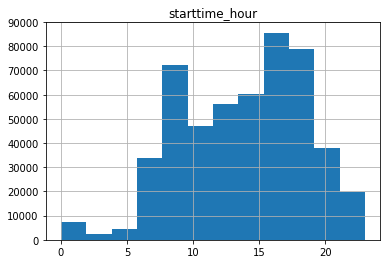

In [239]:
sample_new[sample_new['year']==2019].hist('starttime_hour', bins=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x197206550>]],
      dtype=object)

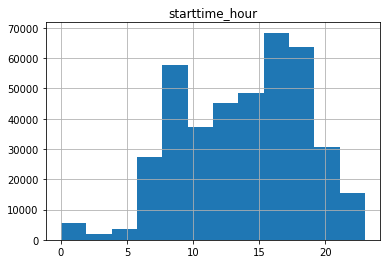

In [240]:
sample_new[sample_new['year']==2018].hist('starttime_hour', bins=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x197264850>]],
      dtype=object)

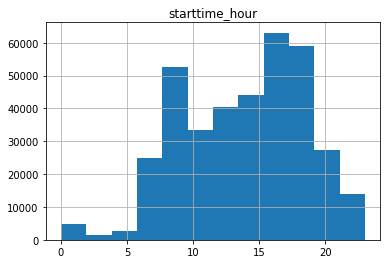

In [241]:
sample_new[sample_new['year']==2017].hist('starttime_hour', bins=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1296994d0>]],
      dtype=object)

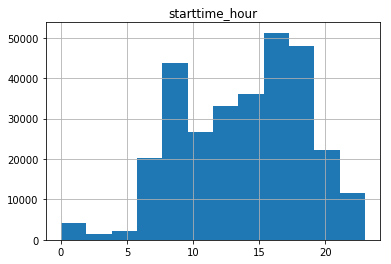

In [242]:
sample_new[sample_new['year']==2016].hist('starttime_hour', bins=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1bb6d51d0>]],
      dtype=object)

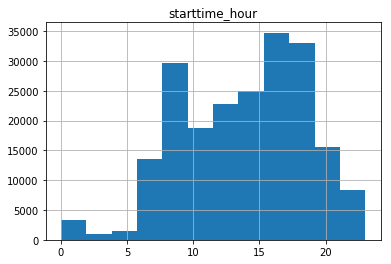

In [243]:
sample_new[sample_new['year']==2015].hist('starttime_hour', bins=12)